In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/laptops_train.csv")

## ***Initial Look at Data***

In [ ]:
df.head(10)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,10303160.40
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00


In [ ]:
# First we dropped unnecessary columns for the ML model --> ['Model Name' , 'Operating System Version']

# 'Model Name' --> It's just a unique identifier for each laptop, not useful for learning patterns.
# Keeping it may lead to overfitting.

# 'Operating System Version' --> Dropped due to limited variation and very low impact on prediction.

df.drop(columns=['Model Name', 'Operating System Version'], inplace=True)


In [ ]:
df.tail()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price
972,Dell,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42kg,24897600.0
973,Toshiba,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,1.95kg,10492560.0
974,Asus,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73kg,18227710.8
975,HP,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04kg,8705268.0
976,Lenovo,Notebook,"14.0""",1366x768,Intel Core i5 6200U 2.3GHz,4GB,508GB Hybrid,Intel HD Graphics 520,Windows,1.70kg,8909784.0


In [ ]:
df.shape

(977, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Category          977 non-null    object 
 2   Screen Size       977 non-null    object 
 3   Screen            977 non-null    object 
 4   CPU               977 non-null    object 
 5   RAM               977 non-null    object 
 6    Storage          977 non-null    object 
 7   GPU               977 non-null    object 
 8   Operating System  977 non-null    object 
 9   Weight            977 non-null    object 
 10  Price             977 non-null    float64
dtypes: float64(1), object(10)
memory usage: 84.1+ KB


In [ ]:
# Remove the inch symbol (") from the 'Screen Size' column and convert it to float --> example : (17.3") -> (17.3)
df['Screen Size'] = df['Screen Size'].str.replace('"', '').astype(float)

# Clean and convert the 'RAM' column to int --> example : (16GB) -> (16)
df['RAM'] = df['RAM'].str.replace('GB', '').astype('int32')

# Clean and convert the 'Weight' column to float --> example : (2.73kg) -> (2.73)
df['Weight'] = df['Weight'].str.replace('kg', '').astype('float32')


In [ ]:
df[['Screen Size', 'RAM', 'Weight']].head()
# Ensuring the changes

,Screen Size,RAM,Weight
0,13.3,8,1.37
1,13.3,8,1.34
2,15.6,8,1.86
3,15.4,16,1.83
4,13.3,8,1.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Category          977 non-null    object 
 2   Screen Size       977 non-null    float64
 3   Screen            977 non-null    object 
 4   CPU               977 non-null    object 
 5   RAM               977 non-null    int32  
 6    Storage          977 non-null    object 
 7   GPU               977 non-null    object 
 8   Operating System  977 non-null    object 
 9   Weight            977 non-null    float32
 10  Price             977 non-null    float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 76.5+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Manufacturer,0
Category,0
Screen Size,0
Screen,0
CPU,0
RAM,0
Storage,0
GPU,0
Operating System,0
Weight,0


In [ ]:
df.describe()

,Screen Size,RAM,Weight,Price
count,977.00000,977.000000,977.000000,9.770000e+02
mean,15.05261,8.528147,2.039128,1.001899e+07
std,1.41895,4.997487,0.666008,6.306430e+06
min,10.10000,2.000000,0.690000,1.706375e+06
25%,14.00000,4.000000,1.500000,5.326308e+06
50%,15.60000,8.000000,2.020000,8.527428e+06
75%,15.60000,8.000000,2.300000,1.311570e+07
max,18.40000,32.000000,4.700000,5.423231e+07


In [ ]:
df['Price'] = df['Price'] / 1_000

In [ ]:
df.describe()

,Screen Size,RAM,Weight,Price
count,977.00000,977.000000,977.000000,977.000000
mean,15.05261,8.528147,2.039128,10018.994560
std,1.41895,4.997487,0.666008,6306.430015
min,10.10000,2.000000,0.690000,1706.374800
25%,14.00000,4.000000,1.500000,5326.308000
50%,15.60000,8.000000,2.020000,8527.428000
75%,15.60000,8.000000,2.300000,13115.700000
max,18.40000,32.000000,4.700000,54232.308000


In [ ]:
df['Screen'].value_counts()

,count
Screen,
Full HD 1920x1080,397
IPS Panel Full HD 1920x1080,181
1366x768,180
Full HD / Touchscreen 1920x1080,38
IPS Panel Full HD / Touchscreen 1920x1080,35
1600x900,19
Touchscreen 1366x768,15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160,11
IPS Panel 4K Ultra HD 3840x2160,10


In [ ]:
df['Touchscreen'] = df['Screen'].apply(lambda x:1 if 'Touchscreen' in x else 0)
# Create a new column 'Touchscreen': 1 if the 'Screen' description contains 'Touchscreen', else 0
# Example : IPS Panel Full HD 1920x1200 --> 0
# Example : IPS Panel Touchscreen 2560x1440 --> 1

In [ ]:
df['Ips'] = df['Screen'].apply(lambda x:1 if 'IPS' in x else 0)
# Create a new column 'Ips': 1 if the 'Screen' description contains 'IPS', else 0
# Example : IPS Panel Full HD 1920x1200 --> 1
# Example : Quad HD+ 3200x1800 --> 0

In [ ]:
df[['Screen' , 'Touchscreen' , 'Ips']].head()

,Screen,Touchscreen,Ips
0,IPS Panel Retina Display 2560x1600,0,1
1,1440x900,0,0
2,Full HD 1920x1080,0,0
3,IPS Panel Retina Display 2880x1800,0,1
4,IPS Panel Retina Display 2560x1600,0,1


In [ ]:
# Extract the width and height from the 'Screen' column
# Split at first 'x', then take the first part as X_res (width) and the second as Y_res (height)
# Example : IPS Panel Retina Display 2560x1600 --> we split at 2560(x) and assign it to X_res , the rest to Y_res

df['X_res'] = df['Screen'].str.split('x', n=1, expand=True)[0]
df['Y_res'] = df['Screen'].str.split('x', n=1, expand=True)[1]

In [ ]:
df[['Screen' , 'X_res' , 'Y_res']].head()

,Screen,X_res,Y_res
0,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display 2560,1600
1,1440x900,1440,900
2,Full HD 1920x1080,Full HD 1920,1080
3,IPS Panel Retina Display 2880x1800,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display 2560,1600


In [ ]:
# Remove commas, extract numeric part (including decimals) from 'X_res', then take the first match

df['X_res'] = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
df[['Screen' , 'X_res' , 'Y_res']].head()

,Screen,X_res,Y_res
0,IPS Panel Retina Display 2560x1600,2560,1600
1,1440x900,1440,900
2,Full HD 1920x1080,1920,1080
3,IPS Panel Retina Display 2880x1800,2880,1800
4,IPS Panel Retina Display 2560x1600,2560,1600


In [ ]:
df['X_res']=df['X_res'].astype('int32')
df['Y_res']=df['Y_res'].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Category          977 non-null    object 
 2   Screen Size       977 non-null    float64
 3   Screen            977 non-null    object 
 4   CPU               977 non-null    object 
 5   RAM               977 non-null    int32  
 6    Storage          977 non-null    object 
 7   GPU               977 non-null    object 
 8   Operating System  977 non-null    object 
 9   Weight            977 non-null    float32
 10  Price             977 non-null    float64
 11  Touchscreen       977 non-null    int64  
 12  Ips               977 non-null    int64  
 13  X_res             977 non-null    int32  
 14  Y_res             977 non-null    int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 99.4+ KB


##**EDA**

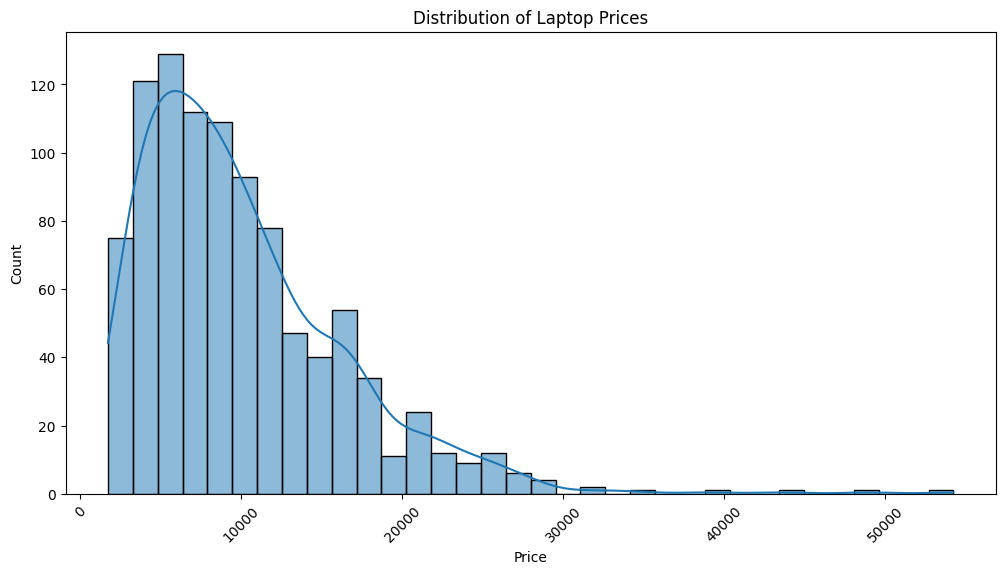

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True)  # Plot histogram with KDE (density curve)
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation
plt.xticks(rotation=45)
plt.title('Distribution of Laptop Prices')
plt.show()


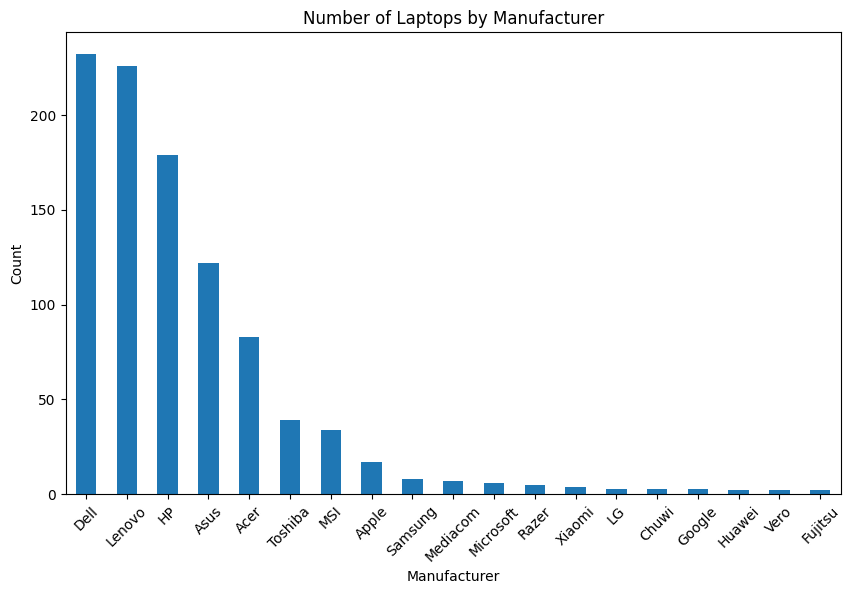

In [ ]:
import matplotlib.pyplot as plt

# Count manufacturers
manufacturer_counts = df['Manufacturer'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
manufacturer_counts.plot(kind='bar')
plt.title('Number of Laptops by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1116180830.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


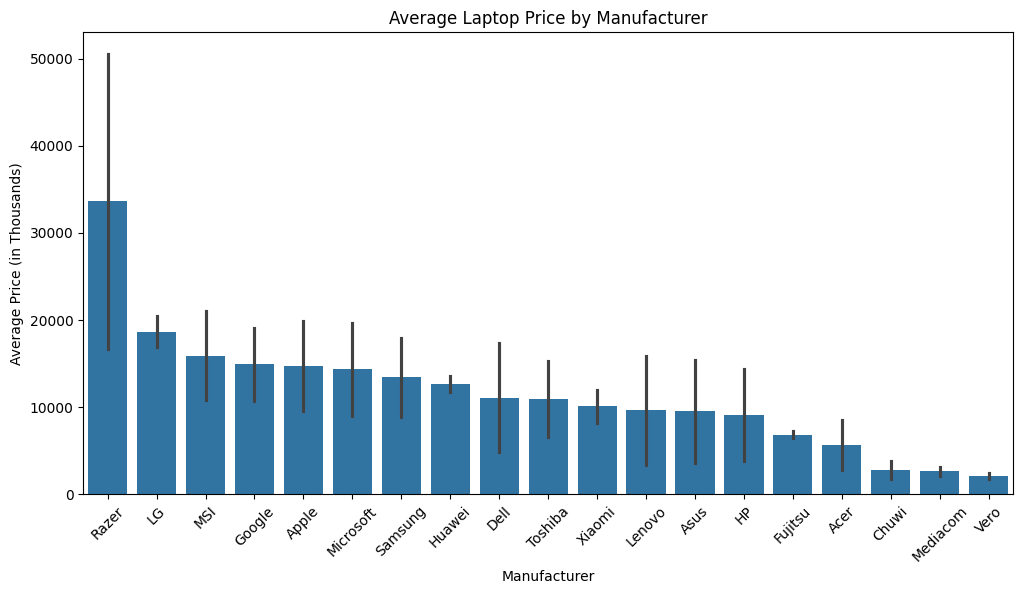

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Manufacturer',
    y='Price',
    data=df,
    ci='sd',
    order=df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False).index
)
plt.title('Average Laptop Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price (in Thousands)')
plt.xticks(rotation=45)
plt.show()


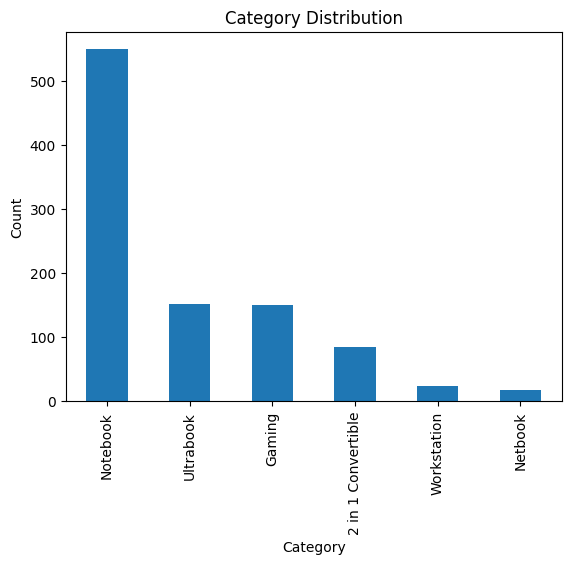

In [ ]:
df['Category'].value_counts().plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3547674654.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


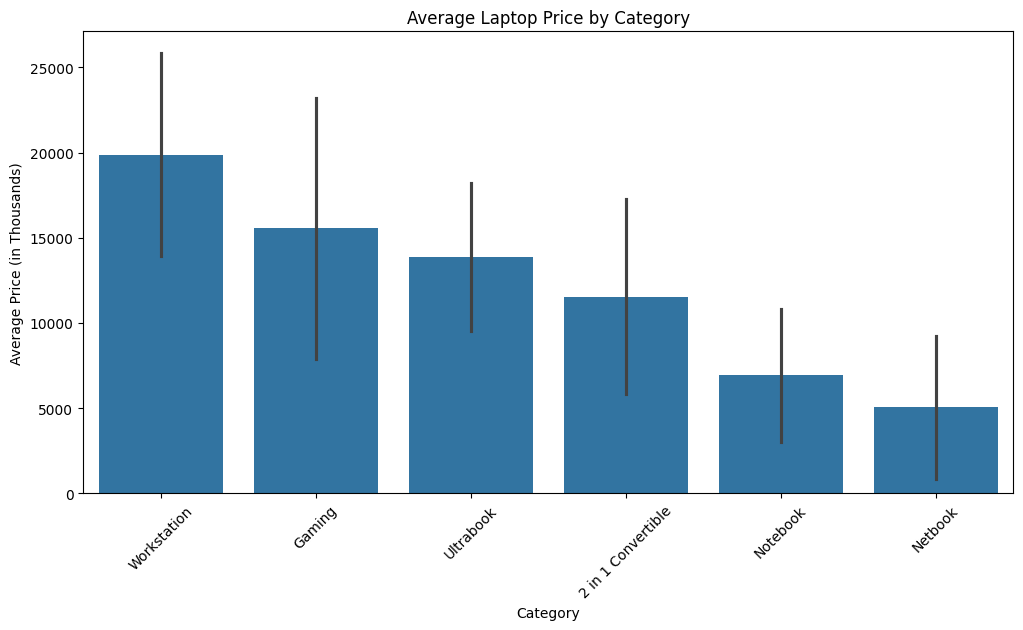

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Category',
    y='Price',
    data=df,
    ci='sd',  # Show standard deviation
    order=df.groupby('Category')['Price'].mean().sort_values(ascending=False).index
)
plt.title('Average Laptop Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price (in Thousands)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


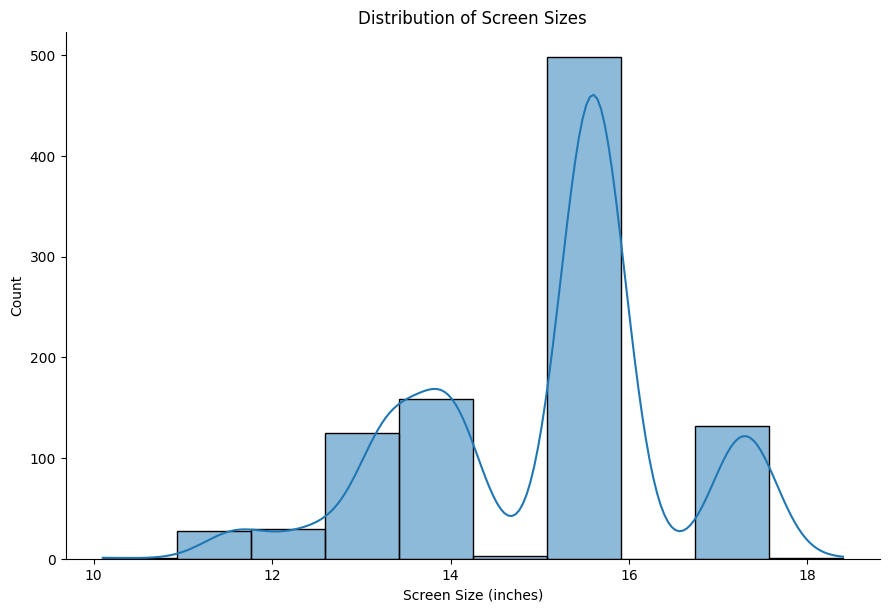

In [ ]:
sns.displot(
    df['Screen Size'],
    kde=True,
    bins=10,
    height=6,
    aspect=1.5
)
plt.title('Distribution of Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Count')
plt.show()


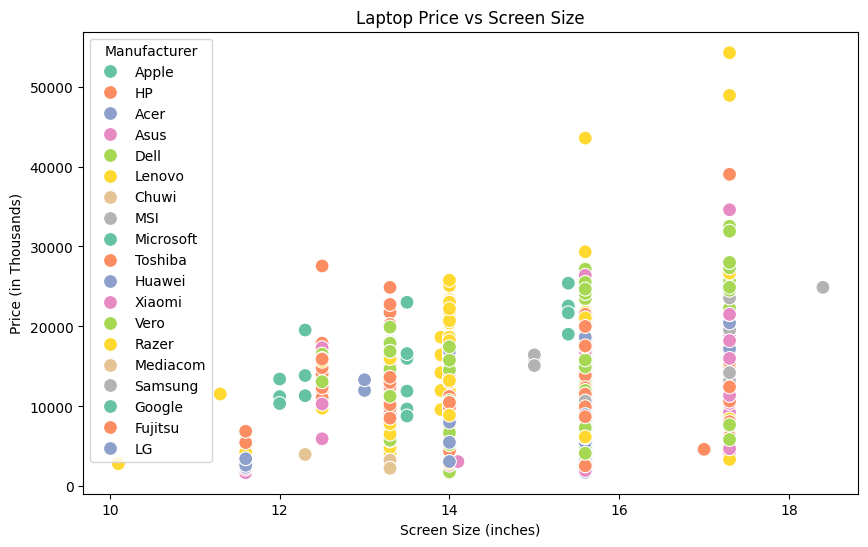

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Screen Size', y='Price', hue='Manufacturer', palette='Set2', s=100)
plt.title('Laptop Price vs Screen Size')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (in Thousands)')
plt.show()

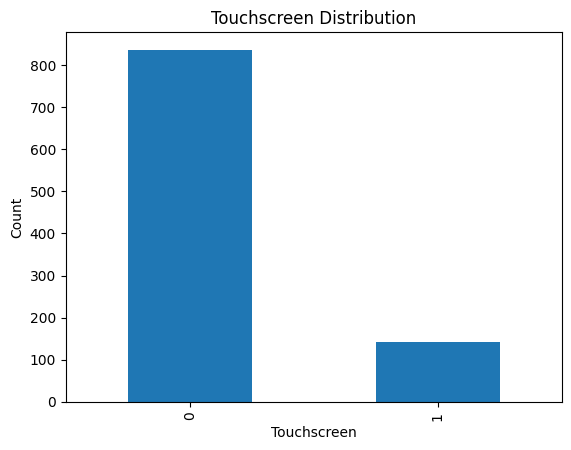

In [ ]:
df['Touchscreen'].value_counts().plot(kind='bar')
plt.title('Touchscreen Distribution')
plt.xlabel('Touchscreen')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3023510643.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Touchscreen', y='Price', data=df, ci='sd')  # Show standard deviation


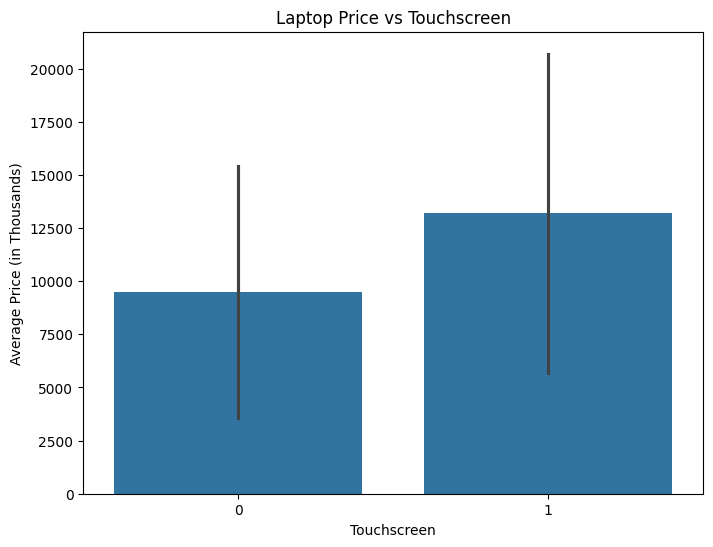

In [ ]:
plt.figure(figsize=(8, 6))  # Bigger figure for clarity
sns.barplot(x='Touchscreen', y='Price', data=df, ci='sd')  # Show standard deviation
plt.title('Laptop Price vs Touchscreen')
plt.xlabel('Touchscreen')
plt.ylabel('Average Price (in Thousands)')
plt.show()


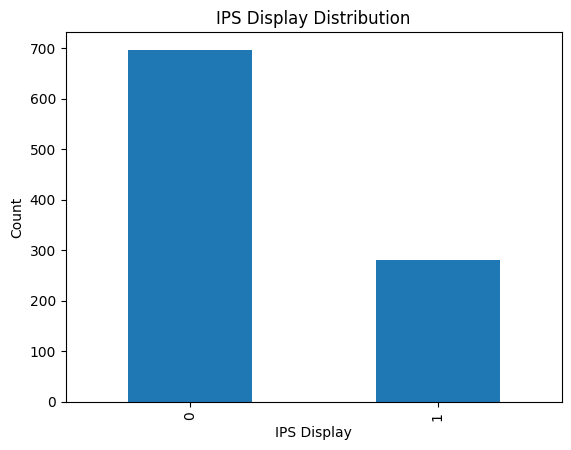

In [ ]:
df['Ips'].value_counts().plot(kind='bar')
plt.title('IPS Display Distribution')
plt.xlabel('IPS Display')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2422623078.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Ips', y='Price', data=df, ci='sd')  # Show standard deviation


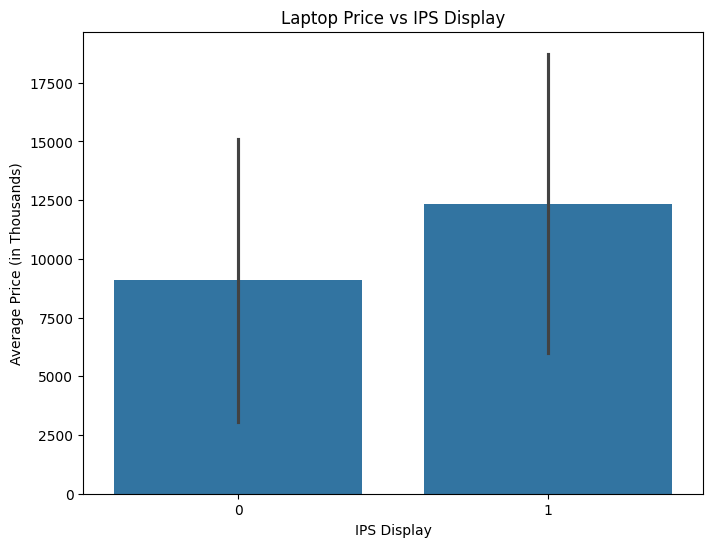

In [ ]:
plt.figure(figsize=(8, 6))  # Bigger figure for clarity
sns.barplot(x='Ips', y='Price', data=df, ci='sd')  # Show standard deviation
plt.title('Laptop Price vs IPS Display')
plt.xlabel('IPS Display')
plt.ylabel('Average Price (in Thousands)')
plt.show()

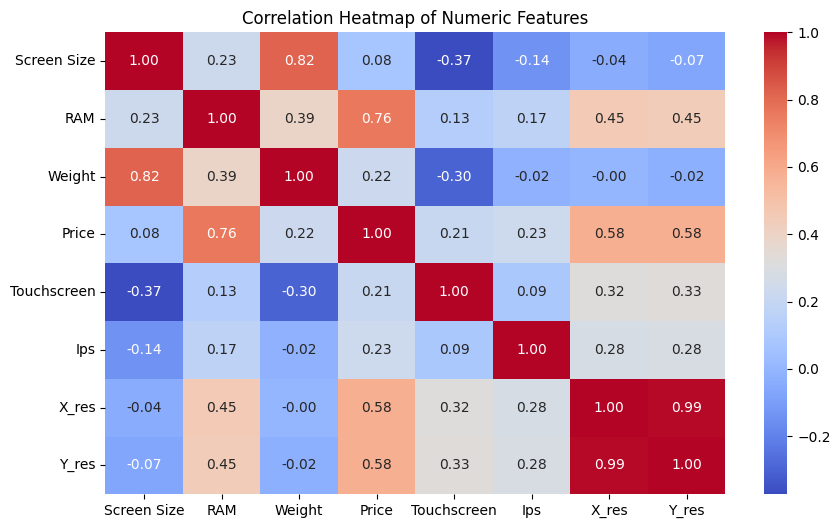

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
# Calculate Pixels Per Inch (PPI) using screen resolution and screen size
# Formula: PPI = sqrt(X_res^2 + Y_res^2) / Screen Size
# This gives the pixel density of the screen, indicating display sharpness

df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Screen Size']).astype('float')


In [ ]:
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
numeric_df.corr()['Price']                       # Compute correlation with Price


,Price
Screen Size,0.075152
RAM,0.764005
Weight,0.224415
Price,1.000000
Touchscreen,0.206893
Ips,0.234718
X_res,0.579901
Y_res,0.577594
ppi,0.499022


In [ ]:
# Drop ['Screen', 'Screen Size', 'X_res', 'Y_res'] because their information is now represented by the new 'ppi' feature
# This simplifies the dataset and removes redundant columns

df.drop(columns=['Screen','Screen Size','X_res', 'Y_res'], inplace=True)

In [ ]:
df.head()

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912.52348,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993.37448,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112.90000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563.00540,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037.61120,0,1,226.983005


In [ ]:
# df['CPU'].value_counts().to_dict()

In [ ]:
df['CPU'].value_counts()

,count
CPU,
Intel Core i5 7200U 2.5GHz,151
Intel Core i7 7700HQ 2.8GHz,123
Intel Core i7 7500U 2.7GHz,103
Intel Core i7 8550U 1.8GHz,71
Intel Core i5 8250U 1.6GHz,71
...,...
Intel Core M m7-6Y75 1.2GHz,1
AMD FX 8800P 2.1GHz,1
Intel Core M M7-6Y75 1.2GHz,1


In [ ]:
# Extract the first three words from the 'CPU' column to identify the CPU family/type

df['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

,CPU
0,Intel Core i5
1,Intel Core i5
2,Intel Core i5
3,Intel Core i7
4,Intel Core i5
...,...
972,Intel Core i7
973,Intel Core i5
974,Intel Core i7
975,Intel Core i5


In [ ]:
# Extract the main part of the CPU name by taking the first 3 words from the original CPU string
# Example: "Intel Core i7 7700HQ" → "Intel Core i7"

df['Cpu Name']=df['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:
df.sample(5)

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
939,Dell,Gaming,Intel Core i7 6820HK 2.7GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows,4.36,24524.13600,0,0,169.780899,Intel Core i7
25,Dell,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows,2.30,3722.54688,0,0,100.454670,Intel Core i3
912,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,6,256GB SSD,Nvidia GeForce 940MX,Windows,2.20,7015.78800,0,0,141.211998,Intel Core i7
827,Dell,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows,1.76,5201.82000,0,0,111.935204,Intel Core i3
726,Dell,Notebook,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows,2.20,6393.34800,0,0,141.211998,Intel Core i5


In [ ]:
# Show all unique CPU names
unique_cpus = df['CPU'].unique()
print(unique_cpus)


['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Atom x5-Z8350 1.44GHz' 'Intel Core i5 7300HQ 2.5GHz'
 'AMD E-Series E2-9000e 1.5GHz' 'Intel Core i5 1.6GHz'
 'Intel Core i7 8650U 1.9GHz' 'Intel Atom x5-Z8300 1.44GHz'
 'AMD E-Series E2-6110 1.5GHz' 'AMD A6-Series 9220 2.5GHz'
 'Intel Celeron Dual Core N3350 1.1GHz' 'Intel Core i3 7130U 2.7GHz'
 'Intel Core i7 7700HQ 2.8GHz' 'Intel Core i5 2.0GHz'
 'AMD Ryzen 1700 3GHz' 'Intel Pentium Quad Core N4200 1.1GHz'
 'Intel Atom x5-Z8550 1.44GHz' 'Intel Celeron Dual Core N3060 1.6GHz'
 'Intel Core i5 1.3GHz' 'AMD FX 9830P 3GHz' 'Intel Core i7 7560U 2.4GHz'
 'AMD E-Series 6110 1.5GHz' 'Intel Core i5 620

In [ ]:
# Function to simplify CPU names into main categories
# Returns:
# - 'Intel Core i7', 'Intel Core i5', or 'Intel Core i3' as is
# - 'Other Intel Processor' for any other Intel CPUs
# - 'AMD Processor' for all non-Intel CPUs

def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
      if text.split()[0] == 'Intel':
        return 'Other Intel Processor'
      else:
        return 'AMD Processor'

In [ ]:

df['Cpu brand']=df['Cpu Name'].apply(fetch_processor)

In [ ]:
df.sample(10)

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
221,Lenovo,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows,1.74,7993.90800,0,1,157.350512,Intel Core i5,Intel Core i5
427,Dell,Ultrabook,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Linux,1.60,9772.30800,0,0,157.350512,Intel Core i7,Intel Core i7
694,Toshiba,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows,1.50,8651.91600,0,1,165.632118,Intel Core i5,Intel Core i5
958,Dell,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows,1.30,11275.05600,0,0,276.053530,Intel Core i7,Intel Core i7
908,Lenovo,Notebook,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows,2.60,7015.78800,0,1,141.211998,Intel Core i5,Intel Core i5
735,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Windows,1.85,6926.86800,0,0,141.211998,Intel Core i7,Intel Core i7
821,Toshiba,Ultrabook,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows,1.25,9692.28000,0,0,111.935204,Intel Core i5,Intel Core i5
59,Asus,Notebook,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.00,3690.18000,0,0,141.211998,Intel Core i3,Intel Core i3
263,Dell,Notebook,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 620,Windows,2.18,5842.04400,0,0,141.211998,Intel Core i5,Intel Core i5
130,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows,2.36,5681.89908,0,0,100.454670,Intel Core i5,Intel Core i5


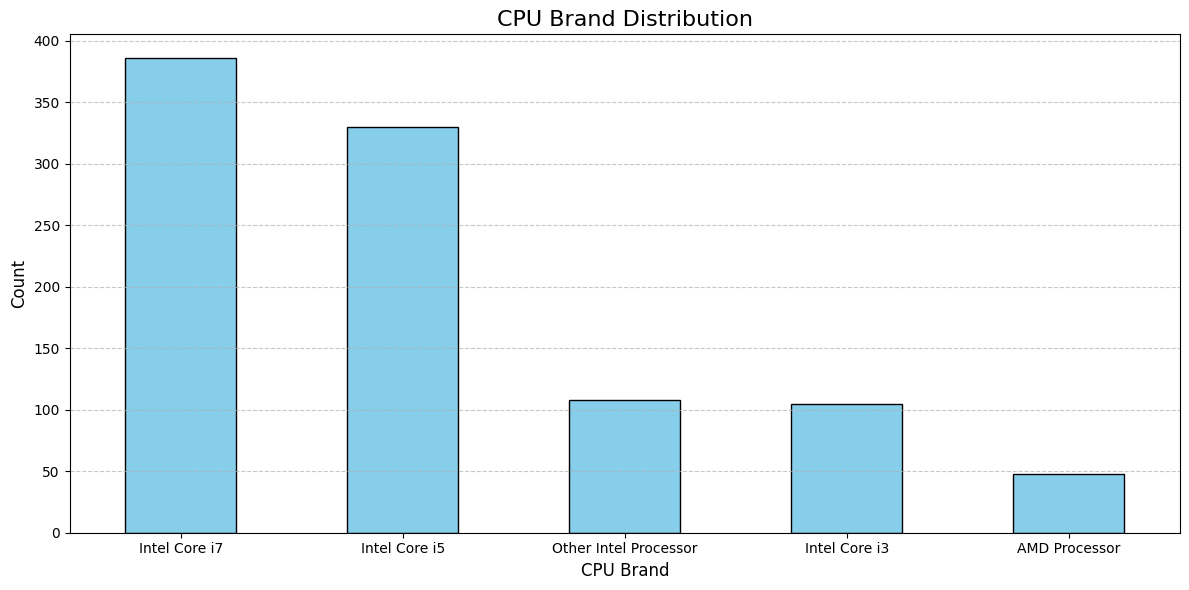

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df['Cpu brand'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('CPU Brand Distribution', fontsize=16)
plt.xlabel('CPU Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipython-input-1313117041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cpu brand', y='Price', data=df, palette='pastel')


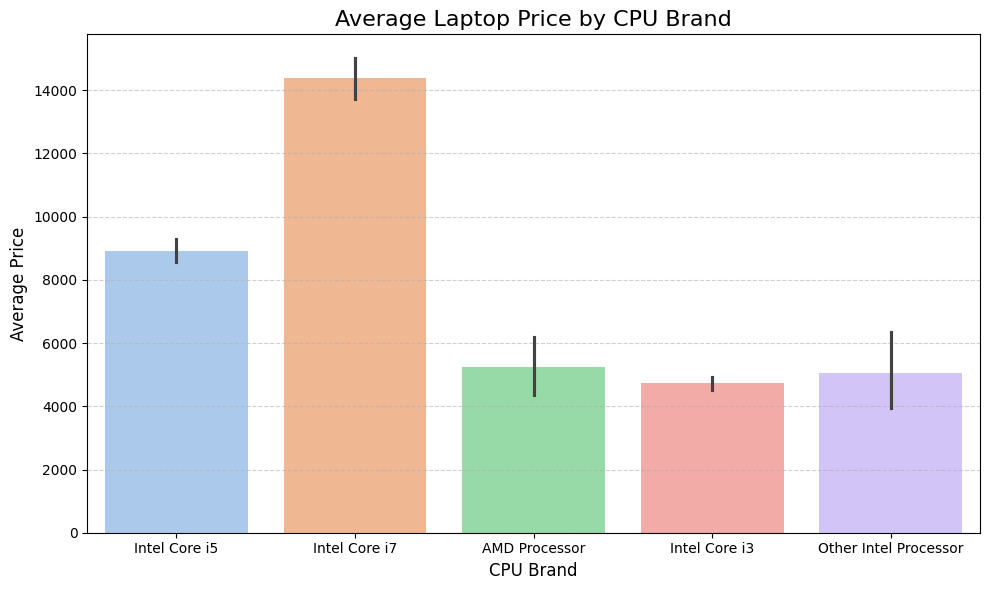

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cpu brand', y='Price', data=df, palette='pastel')

plt.title('Average Laptop Price by CPU Brand', fontsize=16)
plt.xlabel('CPU Brand', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns=['CPU', 'Cpu Name'], inplace=True)

In [ ]:
df.sample(10)

,Manufacturer,Category,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
229,HP,Notebook,8,1TB HDD,AMD FirePro W4190M,Windows,1.90,11283.94800,0,0,141.211998,Intel Core i7
832,Asus,Notebook,4,1TB HDD,Nvidia GeForce 920,Linux,2.10,4614.94800,0,0,141.211998,Intel Core i5
314,Asus,2 in 1 Convertible,2,32GB Flash Storage,Intel HD Graphics 500,Windows,1.10,2445.30000,1,0,135.094211,Other Intel Processor
375,HP,Notebook,4,256GB SSD,AMD Radeon R5,Windows,1.91,4348.09908,0,0,141.211998,AMD Processor
392,Acer,Notebook,12,1TB HDD,Nvidia GeForce MX130,Windows,2.20,6170.95908,0,1,100.454670,Intel Core i5
148,MSI,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,2.90,18041.86800,0,0,127.335675,Intel Core i7
851,Asus,Gaming,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.10,16885.90800,0,0,141.211998,Intel Core i7
137,Asus,Gaming,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows,3.00,8340.69600,0,0,127.335675,Intel Core i5
816,Razer,Ultrabook,16,512GB SSD,Intel HD Graphics 620,Windows,1.29,15996.70800,1,1,352.465147,Intel Core i7
158,Dell,2 in 1 Convertible,8,256GB SSD,Intel UHD Graphics 620,Windows,1.56,9327.70800,1,0,141.211998,Intel Core i7


In [ ]:
df['RAM'].value_counts()

,count
RAM,
8,483
4,271
16,149
6,24
12,21
32,16
2,10
24,3


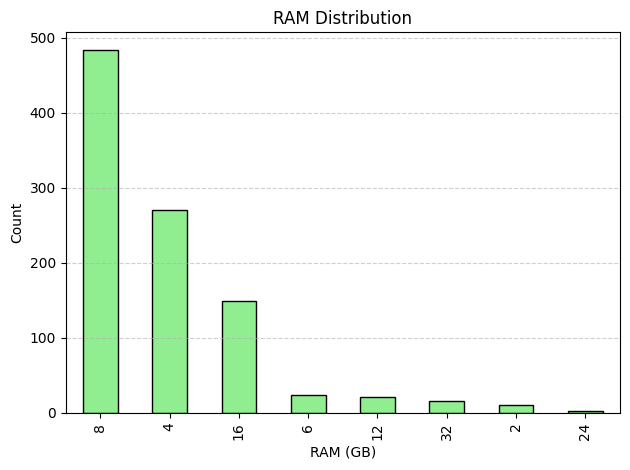

In [ ]:
df['RAM'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('RAM Distribution')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1874422832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RAM', y='Price', data=df, palette='pastel')


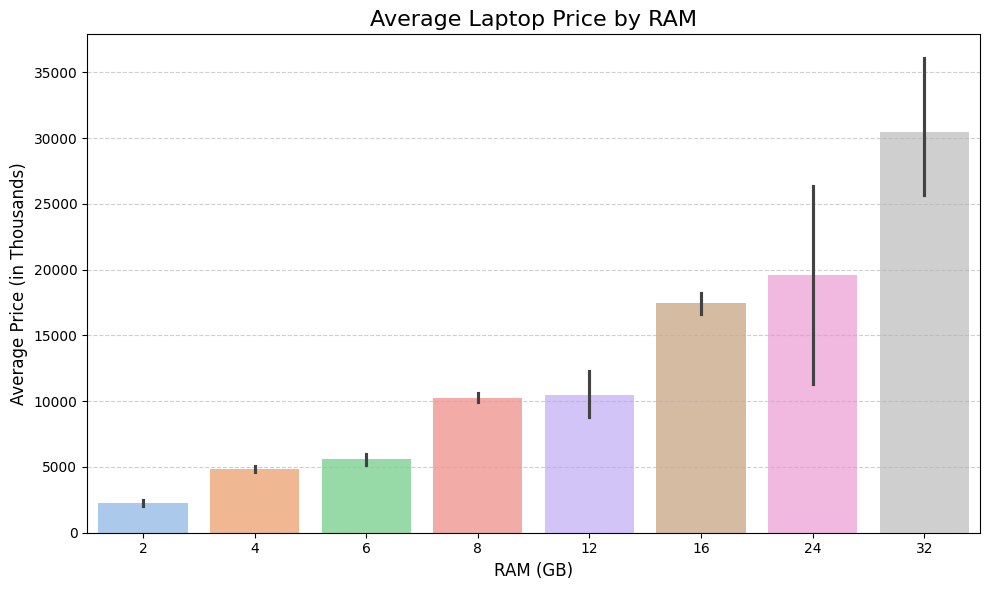

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='RAM', y='Price', data=df, palette='pastel')

plt.title('Average Laptop Price by RAM', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Average Price (in Thousands)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Manufacturer,Category,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912.52348,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993.37448,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112.90000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563.00540,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037.61120,0,1,226.983005,Intel Core i5


In [ ]:
df[' Storage'].value_counts()

,count
Storage,
256GB SSD,318
1TB HDD,171
512GB SSD,91
500GB HDD,79
128GB SSD + 1TB HDD,71
128GB SSD,62
256GB SSD + 1TB HDD,52
32GB Flash Storage,29
2TB HDD,14


In [ ]:
# -------------------------------------------
# 🧹 Storage Column Processing & Feature Engineering
# -------------------------------------------
# The original 'Storage' column contains mixed values like:
# "128GB SSD + 1TB HDD", "256GB SSD", "64GB Flash Storage", etc.
#
# Goal:
# - Extract the actual size (in GB) of each storage type separately:
#     HDD, SSD, Hybrid, Flash Storage
# - Convert TB to GB (1TB = 1000GB)
# - Split entries with multiple storage types (e.g., "+")
# - Create separate columns for each storage type with numeric values
#
# Result:
# - Four new numerical columns: 'HDD', 'SSD', 'Hybrid', 'Flash_Storage'
# - Clean and ready for analysis or machine learning

# 1. Clean storage format: remove ".0", replace GB/TB
df[' Storage'] = df[' Storage'].astype(str).replace(r'\.0', '', regex=True)
df[" Storage"] = df[" Storage"].str.replace('GB', '')
df[" Storage"] = df[" Storage"].str.replace('TB', '000')

# 2. Split storage into two parts (if + exists)
new = df[" Storage"].str.split("+", n=1, expand=True)
df["first"] = new[0].str.strip()
df["second"] = new[1]
df["second"] = df["second"].fillna("0")

# 3. Identify type of each part (HDD, SSD, Flash Storage, Hybrid)
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# 4. Remove all non-digit characters (keep only size numbers)
df['first'] = df['first'].str.replace(r'\D', '', regex=True)
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# 5. Convert to integers
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# 6. Calculate actual size in GB for each type
df["HDD"] = (df["first"] * df["Layer1HDD"]) + (df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"]) + (df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"]) + (df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"]) + (df["second"] * df["Layer2Flash_Storage"])

# 7. Drop intermediate columns to clean up the dataframe
df.drop(columns=[
    'first', 'second',
    'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
    'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
], inplace=True)


In [ ]:
df.head()

,Manufacturer,Category,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912.52348,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993.37448,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,5112.90000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,22563.00540,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037.61120,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
df.drop(columns=[' Storage'],inplace=True)

In [ ]:
df.head()

,Manufacturer,Category,RAM,GPU,Operating System,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,11912.52348,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,7993.37448,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,5112.90000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,22563.00540,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,16037.61120,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Category          977 non-null    object 
 2   RAM               977 non-null    int32  
 3   GPU               977 non-null    object 
 4   Operating System  977 non-null    object 
 5   Weight            977 non-null    float32
 6   Price             977 non-null    float64
 7   Touchscreen       977 non-null    int64  
 8   Ips               977 non-null    int64  
 9   ppi               977 non-null    float64
 10  Cpu brand         977 non-null    object 
 11  HDD               977 non-null    int64  
 12  SSD               977 non-null    int64  
 13  Hybrid            977 non-null    int64  
 14  Flash_Storage     977 non-null    int64  
dtypes: float32(1), float64(2), int32(1), int64(6), object(5)
memory usage: 107.0+ KB


In [ ]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()['Price']


,Price
RAM,0.764005
Weight,0.224415
Price,1.000000
Touchscreen,0.206893
Ips,0.234718
ppi,0.499022
HDD,-0.088832
SSD,0.670753
Hybrid,-0.011725
Flash_Storage,-0.037147


In [ ]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [ ]:
df.head()

,Manufacturer,Category,RAM,GPU,Operating System,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,11912.52348,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,7993.37448,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,5112.90000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,22563.00540,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,16037.61120,0,1,226.983005,Intel Core i5,0,256


In [ ]:
df['GPU'].value_counts()

,count
GPU,
Intel HD Graphics 620,225
Intel HD Graphics 520,98
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,57
AMD Radeon 530,37
...,...
AMD Radeon R7 M465,1
AMD Radeon R3,1
Nvidia GeForce GTX 1050Ti,1


In [ ]:
df['Gpu brand'] = df['GPU'].apply(lambda x:x.split()[0])

In [ ]:
df.sample(5)

,Manufacturer,Category,RAM,GPU,Operating System,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
664,MSI,Gaming,8,Nvidia GeForce GTX 1060,Windows,2.70,13220.35884,0,0,127.335675,Intel Core i7,1000,128,Nvidia
722,Lenovo,Ultrabook,8,Intel HD Graphics 620,Windows,1.32,13329.10800,0,1,157.350512,Intel Core i5,0,256,Intel
247,Asus,Gaming,16,Nvidia GeForce GTX 1080,Windows,3.60,26667.10800,0,0,127.335675,Intel Core i7,0,256,Nvidia
27,Dell,Notebook,8,AMD Radeon 530,Windows,2.20,7113.60000,0,0,141.211998,Intel Core i5,0,256,AMD
629,Dell,Notebook,8,Nvidia GeForce GTX 1050,Windows,2.00,16183.44000,0,0,141.211998,Intel Core i7,0,256,Nvidia


In [ ]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,525
Nvidia,310
AMD,142


/tmp/ipython-input-1003797209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gpu brand', y='Price', data=df, estimator=np.median, palette='pastel', edgecolor='black')


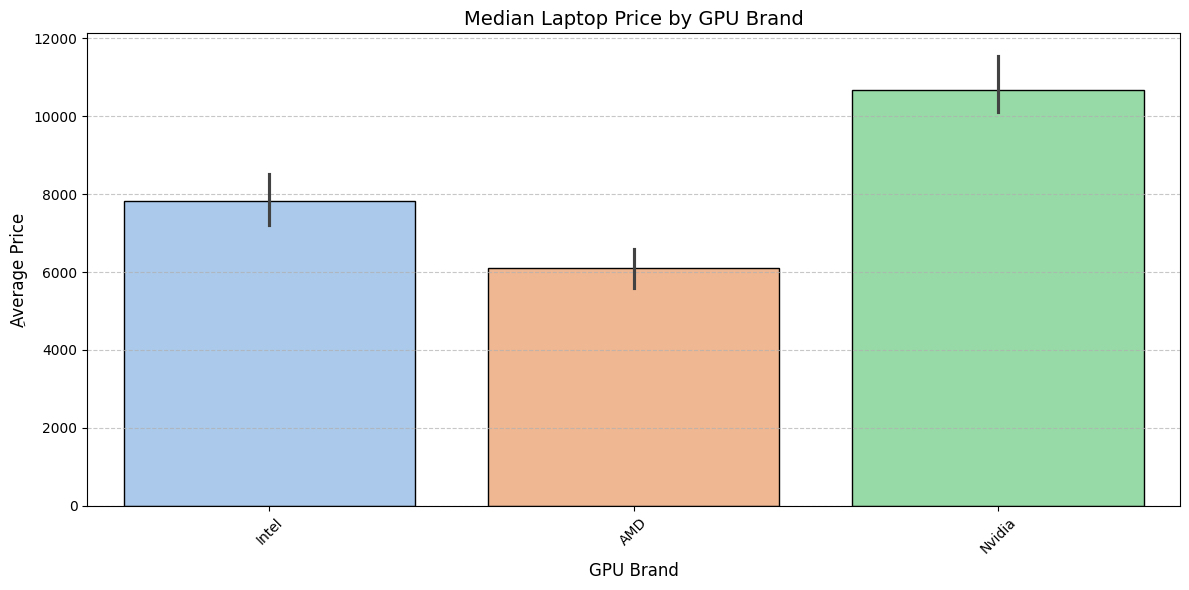

In [ ]:

plt.figure(figsize=(12, 6))  # Set a good size for clarity
sns.barplot(x='Gpu brand', y='Price', data=df, estimator=np.median, palette='pastel', edgecolor='black')

plt.title('Median Laptop Price by GPU Brand', fontsize=14)
plt.xlabel('GPU Brand', fontsize=12)
plt.ylabel('ِAverage Price', fontsize=12)
plt.xticks(rotation=45)  # Slight tilt for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df.drop(columns=['GPU'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Category          977 non-null    object 
 2   RAM               977 non-null    int32  
 3   Operating System  977 non-null    object 
 4   Weight            977 non-null    float32
 5   Price             977 non-null    float64
 6   Touchscreen       977 non-null    int64  
 7   Ips               977 non-null    int64  
 8   ppi               977 non-null    float64
 9   Cpu brand         977 non-null    object 
 10  HDD               977 non-null    int64  
 11  SSD               977 non-null    int64  
 12  Gpu brand         977 non-null    object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 91.7+ KB


In [ ]:
df['Operating System'].value_counts()

,count
Operating System,
Windows,837
No OS,52
Linux,48
Chrome OS,22
macOS,13
Mac OS,4
Android,1


/tmp/ipython-input-318620791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Operating System', y='Price', data=df, palette='pastel', edgecolor='black')


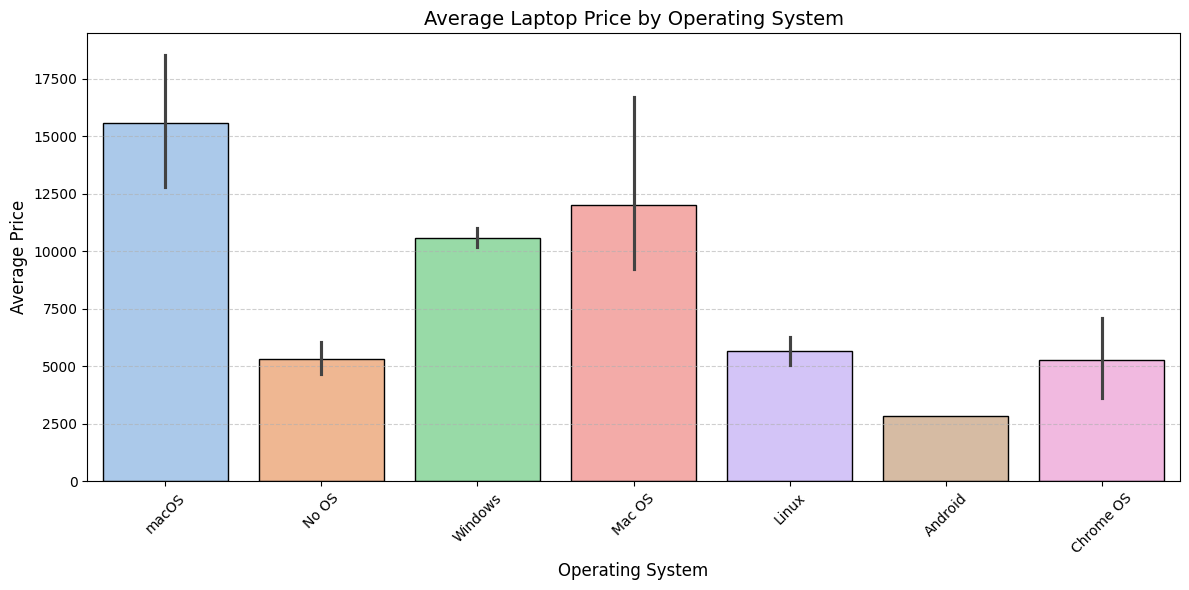

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Operating System', y='Price', data=df, palette='pastel', edgecolor='black')

plt.title('Average Laptop Price by Operating System', fontsize=14)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# 📦 Function to group operating systems into broader categories
# Groups:
# - 'Windows' → 'Windows'
# - 'macOS', 'Mac OS' → 'Mac'
# - 'Linux' → 'Linux'
# - Everything else (No OS, Chrome OS, Android...) → 'Others'

def cat_os(inp):
    if inp == 'Windows':
        return 'Windows'
    elif inp in ['macOS', 'Mac OS']:
        return 'Mac'
    elif inp == 'Linux':
        return 'Linux'
    else:
        return 'Others'



In [ ]:
#  Apply the cat_os function to categorize operating systems
# This creates a new column 'os' with simplified labels:
# 'Windows', 'Mac', 'Linux', or 'Others'
df['OS'] = df['Operating System'].apply(cat_os)


In [ ]:
df.sample(10)

,Manufacturer,Category,RAM,Operating System,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
183,Toshiba,Notebook,8,Windows,2.00,7051.35600,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
738,MSI,Gaming,16,Windows,1.80,18624.11616,0,0,141.211998,Intel Core i7,1000,256,Nvidia,Windows
373,Lenovo,Notebook,4,Windows,2.60,4348.18800,0,0,106.113062,AMD Processor,0,128,AMD,Windows
486,Dell,Workstation,16,Windows,2.17,20789.49600,0,1,141.211998,Intel Core i7,0,512,Nvidia,Windows
349,Dell,Ultrabook,8,Windows,1.90,5895.39600,0,0,141.211998,Intel Core i5,1000,0,AMD,Windows
58,MSI,Gaming,16,Windows,2.43,21776.50800,0,0,127.335675,Intel Core i7,2000,256,Nvidia,Windows
268,HP,Notebook,8,Windows,2.50,9052.05600,0,0,127.335675,Intel Core i7,1000,0,Nvidia,Windows
63,Asus,Notebook,8,Windows,1.40,8367.37200,0,0,157.350512,Intel Core i5,0,256,Intel,Windows
947,Lenovo,Notebook,8,No OS,2.20,6091.02000,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Others
850,HP,Notebook,4,No OS,1.86,2658.70800,0,0,100.454670,Other Intel Processor,0,128,Intel,Others


In [ ]:
df.drop(columns=['Operating System'],inplace=True)


In [ ]:
df.sample(5)

,Manufacturer,Category,RAM,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
517,Asus,Gaming,24,2.24,26391.456,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
190,Lenovo,2 in 1 Convertible,16,1.42,25111.008,1,0,209.800683,Intel Core i7,0,1000,Intel,Windows
465,Asus,Notebook,4,2.00,2703.168,0,0,100.454670,Other Intel Processor,500,0,Intel,Windows
857,HP,2 in 1 Convertible,8,1.28,22754.628,1,0,165.632118,Intel Core i7,0,256,Intel,Windows
688,HP,Notebook,6,2.65,5059.548,0,1,127.335675,AMD Processor,2000,0,AMD,Windows


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  977 non-null    object 
 1   Category      977 non-null    object 
 2   RAM           977 non-null    int32  
 3   Weight        977 non-null    float32
 4   Price         977 non-null    float64
 5   Touchscreen   977 non-null    int64  
 6   Ips           977 non-null    int64  
 7   ppi           977 non-null    float64
 8   Cpu brand     977 non-null    object 
 9   HDD           977 non-null    int64  
 10  SSD           977 non-null    int64  
 11  Gpu brand     977 non-null    object 
 12  OS            977 non-null    object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 91.7+ KB


/tmp/ipython-input-2135474826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OS', y='Price', data=df, palette='pastel', edgecolor='black')


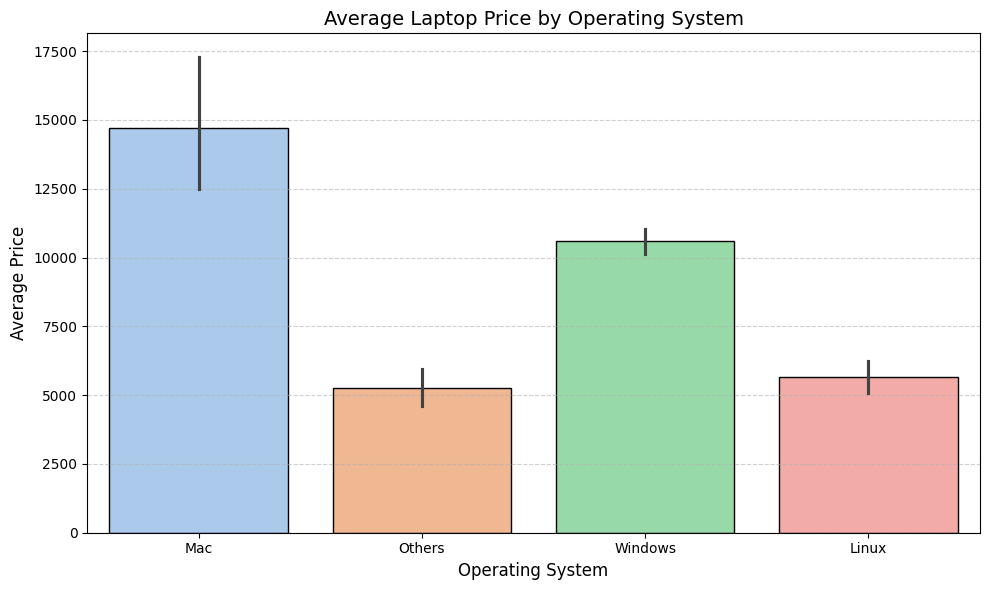

In [ ]:

plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(x='OS', y='Price', data=df, palette='pastel', edgecolor='black')

plt.title('Average Laptop Price by Operating System', fontsize=14)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=0)  # Horizontal labels for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

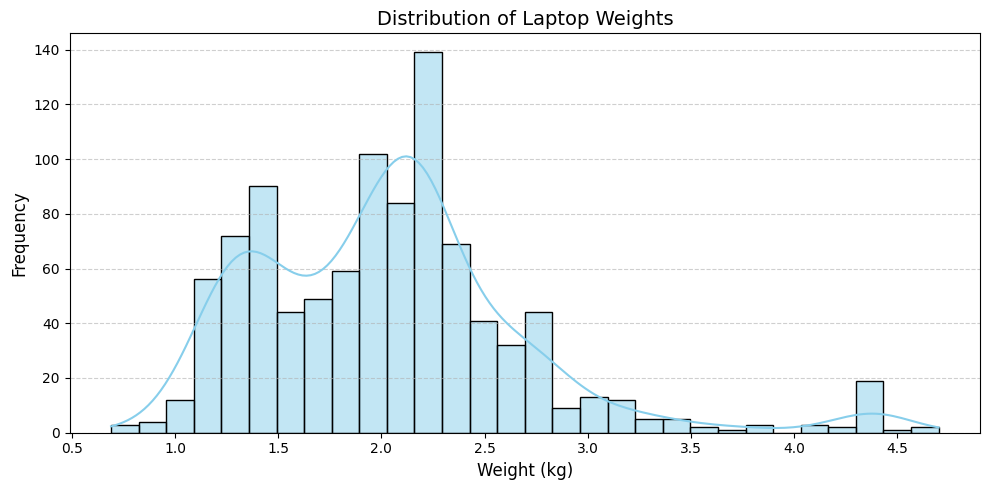

In [ ]:


plt.figure(figsize=(10, 5))
sns.histplot(df['Weight'], kde=True, bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Laptop Weights', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


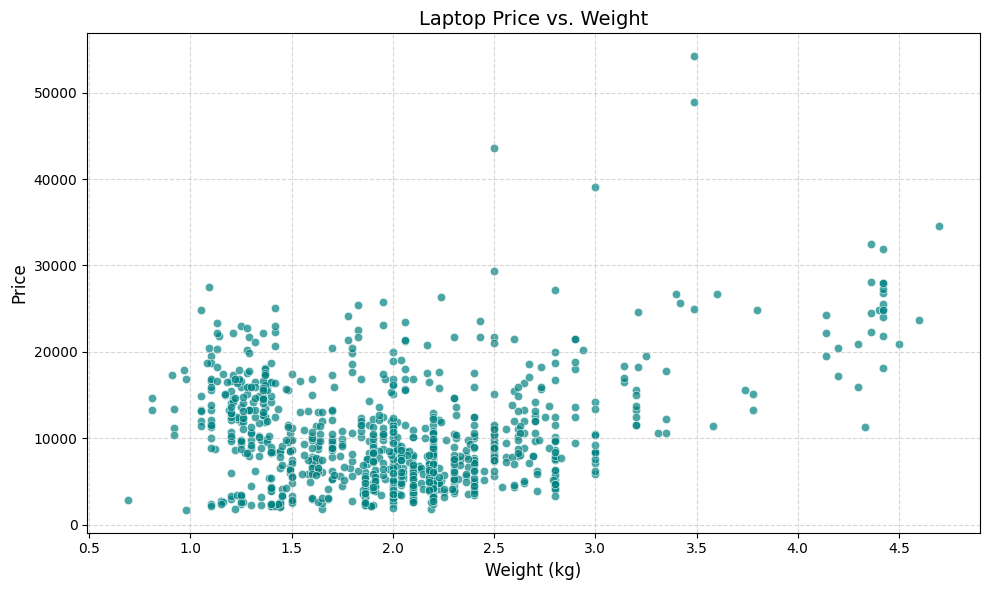

In [ ]:

plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(x='Weight', y='Price', data=df, color='teal', alpha=0.7)

plt.title('Laptop Price vs. Weight', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()['Price']

,Price
RAM,0.764005
Weight,0.224415
Price,1.000000
Touchscreen,0.206893
Ips,0.234718
ppi,0.499022
HDD,-0.088832
SSD,0.670753


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  977 non-null    object 
 1   Category      977 non-null    object 
 2   RAM           977 non-null    int32  
 3   Weight        977 non-null    float32
 4   Price         977 non-null    float64
 5   Touchscreen   977 non-null    int64  
 6   Ips           977 non-null    int64  
 7   ppi           977 non-null    float64
 8   Cpu brand     977 non-null    object 
 9   HDD           977 non-null    int64  
 10  SSD           977 non-null    int64  
 11  Gpu brand     977 non-null    object 
 12  OS            977 non-null    object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 91.7+ KB


## info

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import joblib

# keep a copy of the raw (pre-encoding) df
origin_df = df.copy()
origin_df.to_csv('origin_df.csv', index=False)   # save raw df for Streamlit dropdowns

# List of categorical columns in the same order you will use everywhere
categorical_columns = ['Manufacturer', 'Category', 'Cpu brand', 'Gpu brand', 'OS']

# Create OneHotEncoder — use handle_unknown='ignore' to avoid errors on unseen categories in deployment
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=int, handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_data = ohe.fit_transform(df[categorical_columns])

# Get new column names
encoded_columns = ohe.get_feature_names_out(categorical_columns)

# Convert to DataFrame and replace in df
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)
df = df.drop(columns=categorical_columns)
df = pd.concat([encoded_df, df], axis=1)

# Save the fitted encoder to disk for Streamlit
joblib.dump(ohe, "onehot_encoder.joblib")

# (optional) inspect
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Manufacturer_Apple               977 non-null    int64  
 1   Manufacturer_Asus                977 non-null    int64  
 2   Manufacturer_Chuwi               977 non-null    int64  
 3   Manufacturer_Dell                977 non-null    int64  
 4   Manufacturer_Fujitsu             977 non-null    int64  
 5   Manufacturer_Google              977 non-null    int64  
 6   Manufacturer_HP                  977 non-null    int64  
 7   Manufacturer_Huawei              977 non-null    int64  
 8   Manufacturer_LG                  977 non-null    int64  
 9   Manufacturer_Lenovo              977 non-null    int64  
 10  Manufacturer_MSI                 977 non-null    int64  
 11  Manufacturer_Mediacom            977 non-null    int64  
 12  Manufacturer_Microsoft

In [ ]:
df.head()

,Manufacturer_Apple,Manufacturer_Asus,Manufacturer_Chuwi,Manufacturer_Dell,Manufacturer_Fujitsu,Manufacturer_Google,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_LG,Manufacturer_Lenovo,...,OS_Others,OS_Windows,RAM,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
0,1,0,0,0,0,0,0,0,0,0,...,0,0,8,1.37,11912.52348,0,1,226.983005,0,128
1,1,0,0,0,0,0,0,0,0,0,...,0,0,8,1.34,7993.37448,0,0,127.677940,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,8,1.86,5112.90000,0,0,141.211998,0,256
3,1,0,0,0,0,0,0,0,0,0,...,0,0,16,1.83,22563.00540,0,1,220.534624,0,512
4,1,0,0,0,0,0,0,0,0,0,...,0,0,8,1.37,16037.61120,0,1,226.983005,0,256


# ***Checking & Handling Outliers***

In [ ]:
numerical_cols = df.select_dtypes(include='number')

In [ ]:
# Here we count the number of Outliers in numercal columns to see if affecting data

outliers_count = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_count[col] = len(outliers)

outliers_df = pd.DataFrame(list(outliers_count.items()), columns=["Column", "Outliers_Count"])
outliers_df = outliers_df.sort_values(by="Outliers_Count", ascending=False).reset_index(drop=True)
print(outliers_df)

                             Column  Outliers_Count
0                 Manufacturer_Dell             232
1               Manufacturer_Lenovo             226
2                   Manufacturer_HP             179
3                               RAM             168
4                Category_Ultrabook             152
5                   Category_Gaming             150
6                       Touchscreen             141
7                        OS_Windows             140
8                 Manufacturer_Asus             122
9   Cpu brand_Other Intel Processor             108
10          Cpu brand_Intel Core i3             105
11                              ppi              82
12                        OS_Others              75
13             Manufacturer_Toshiba              39
14                 Manufacturer_MSI              34
15                           Weight              33
16                            Price              29
17             Category_Workstation              24
18          

In [ ]:
# SSD & Hybrid won't be much of a problem. So, leaving them is better.
# Also, every encoded feature binary (0/1), leaving it is mandatory. As the model will treat (1) as outlier
# We store the columns needed to be cleaned.

cols_to_clean = cols_to_clean = ['RAM', 'ppi', 'Weight', 'Price']

print("Columns to clean:", cols_to_clean)

Columns to clean: ['RAM', 'ppi', 'Weight', 'Price']


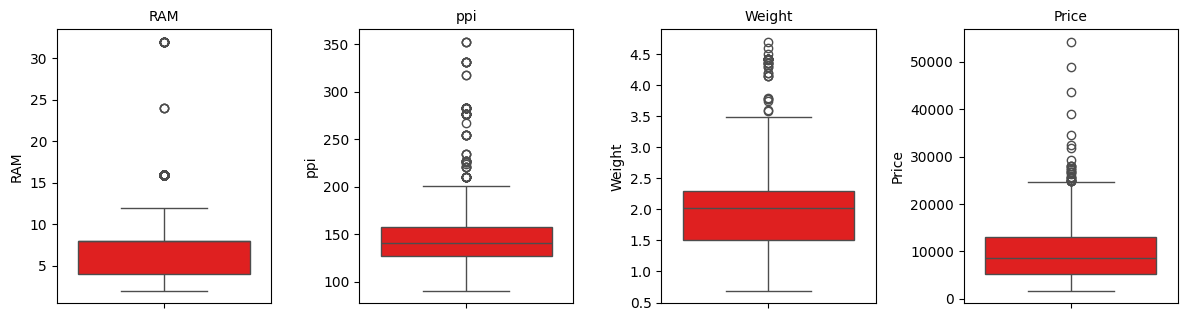

In [ ]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(cols_to_clean, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[col], color="red")
    plt.title(f'{col}', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Using Z_score (Not Recommended)

df_zscore = df.copy()

for col in cols_to_clean:
    mean = df_zscore[col].mean()
    std = df_zscore[col].std()

    z_scores = (df_zscore[col] - mean) / std
    df_zscore = df_zscore[(np.abs(z_scores) < 3) | (df_zscore[col].isna())]

print("Shape before:", df.shape)
print("Shape after cleaning (Z-score):", df_zscore.shape)

Shape before: (977, 40)
Shape after cleaning (Z-score): (890, 40)


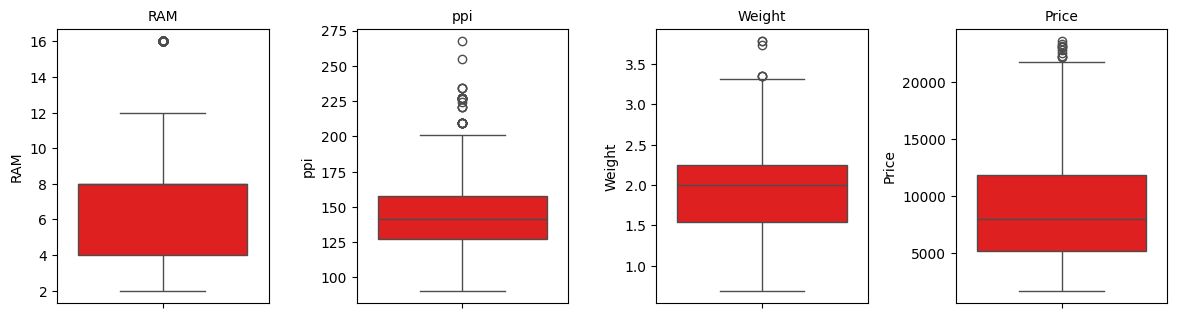

In [ ]:
# Plotting df_zscore

plt.figure(figsize=(15, 15))

for i, col in enumerate(cols_to_clean, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df_zscore[col], color="red")
    plt.title(f'{col}', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Using IQR (Recommended)

df_iqr = df.copy()

def replace_outliers_with_bounds(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data.loc[data[column] < lower_bound, column] = lower_bound
    data.loc[data[column] > upper_bound, column] = upper_bound

    return data

for col in cols_to_clean:
    df_iqr = replace_outliers_with_bounds(df_iqr, col)

print("Shape before:", df.shape)
print("Shape after cleaning (IQR):", df_iqr.shape)

Shape before: (977, 40)
Shape after cleaning (IQR): (977, 40)


/tmp/ipython-input-1795938675.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.4999998807907104' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[data[column] > upper_bound, column] = upper_bound


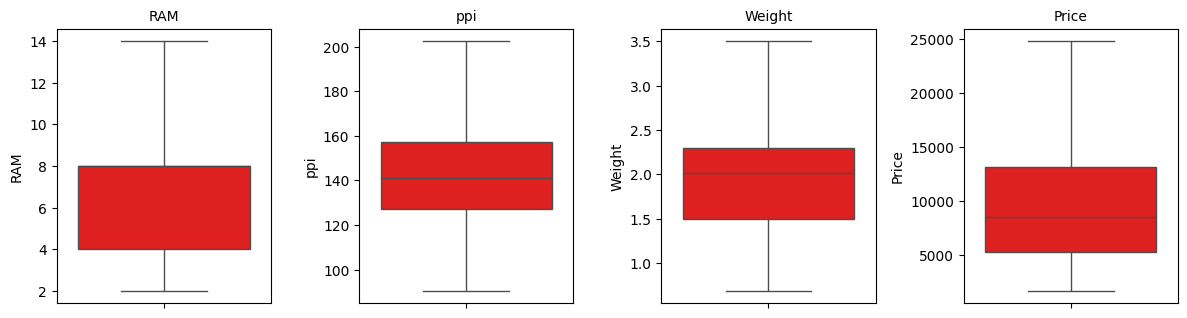

In [ ]:
# Plotting df_iqr

plt.figure(figsize=(15, 15))

for i, col in enumerate(cols_to_clean, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df_iqr[col], color="red")
    plt.title(f'{col}', fontsize=10)

plt.tight_layout()
plt.show()

# ***Training & Testing***

In [ ]:
#  Feature & Target Preparation for Modeling
# -------------------------------------------
# X: Input features — drop the 'Price' column since it's the target variable.
# y: Target variable — apply log transformation to 'Price' to reduce skewness,
#     improve model performance, and handle outliers more effectively.
#     This is useful when price values span a wide range.

X = df.drop(columns=['Price'])
y = np.log(df['Price'])

***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,      # limit depth to avoid overfitting
    min_samples_split=10,
    min_samples_leaf=5
)

In [ ]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Decision Tree Performance (df):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

Decision Tree Performance (df):
MAE  : 0.2007
RMSE : 0.2614
R²   : 0.8183


In [ ]:
X = df_zscore.drop(columns=['Price'])
y = np.log(df_zscore['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,      # limit depth to avoid overfitting
    min_samples_split=10,
    min_samples_leaf=5
)

In [ ]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Decision Tree Performance (df_zscore):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

Decision Tree Performance (df_zscore):
MAE  : 0.2154
RMSE : 0.2834
R²   : 0.7441


In [ ]:
X = df_iqr.drop(columns=['Price'])
y = np.log(df_iqr['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,      # limit depth to avoid overfitting
    min_samples_split=10,
    min_samples_leaf=5
)

In [ ]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Decision Tree Performance (df_iqr):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

Decision Tree Performance (df_iqr):
MAE  : 0.1925
RMSE : 0.2514
R²   : 0.8262


***Decision Tree Performance:***


1.   df

    MAE  : 0.2007
    RMSE : 0.2614
    R²   : 0.8183

2.   df_zscore

    MAE  : 0.2154
    RMSE : 0.2834
    R²   : 0.7441

3.   df_iqr

    MAE  : 0.1925
    RMSE : 0.2514
    R²   : 0.8262





***Conclusion:***

**df_iqr** gave the best performance with the lowest errors (MAE & RMSE) and highest R².


---



KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
best_n = None
best_rmse = float("inf")

for model in [KNeighborsRegressor(n_neighbors=i) for i in range(1, 31)]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # define rmse here
    r2 = r2_score(y_test, y_pred)

    print(f"KNN Model Performance (n_neighbors={model.n_neighbors}):")
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R^2 Score:", r2)
    print("-" * 30)

    # Track the best one by RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_n = model.n_neighbors

print(f"\n✅ Best n_neighbors: {best_n} with RMSE = {best_rmse:.4f}")

KNN Model Performance (n_neighbors=1):
MAE: 0.2075549419260662
RMSE: 0.2970511696241464
R^2 Score: 0.7654529562015703
------------------------------
KNN Model Performance (n_neighbors=2):
MAE: 0.20610736947020725
RMSE: 0.2987797969236239
R^2 Score: 0.7627152183024322
------------------------------
KNN Model Performance (n_neighbors=3):
MAE: 0.19269817015879243
RMSE: 0.2762675460658811
R^2 Score: 0.7971256364997631
------------------------------
KNN Model Performance (n_neighbors=4):
MAE: 0.19606093510337658
RMSE: 0.27577761651596583
R^2 Score: 0.7978445484010763
------------------------------
KNN Model Performance (n_neighbors=5):
MAE: 0.20186660464926795
RMSE: 0.2791302641420171
R^2 Score: 0.7928994352563052
------------------------------
KNN Model Performance (n_neighbors=6):
MAE: 0.20719557438862496
RMSE: 0.27778083617456273
R^2 Score: 0.7948970098750564
------------------------------
KNN Model Performance (n_neighbors=7):
MAE: 0.2094259148198226
RMSE: 0.2744930338617713
R^2 Score: 

In [ ]:
X = df_zscore.drop(columns=['Price'])
y = np.log(df_zscore['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
best_n = None
best_rmse = float("inf")

for model in [KNeighborsRegressor(n_neighbors=i) for i in range(1, 31)]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # define rmse here
    r2 = r2_score(y_test, y_pred)

    print(f"KNN Model Performance (n_neighbors={model.n_neighbors}):")
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R^2 Score:", r2)
    print("-" * 30)

    # Track the best one by RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_n = model.n_neighbors

print(f"\n✅ Best n_neighbors: {best_n} with RMSE = {best_rmse:.4f}")



KNN Model Performance (n_neighbors=1):
MAE: 0.22191098807540627
RMSE: 0.28307929511913943
R^2 Score: 0.7445843677557967
------------------------------
KNN Model Performance (n_neighbors=2):
MAE: 0.19917203275127146
RMSE: 0.264333890064455
R^2 Score: 0.777291415570532
------------------------------
KNN Model Performance (n_neighbors=3):
MAE: 0.20316595686588787
RMSE: 0.28131917960846536
R^2 Score: 0.7477507129835965
------------------------------
KNN Model Performance (n_neighbors=4):
MAE: 0.2047829903267959
RMSE: 0.27857885854507136
R^2 Score: 0.7526410822962191
------------------------------
KNN Model Performance (n_neighbors=5):
MAE: 0.20409311674706335
RMSE: 0.2822357839474754
R^2 Score: 0.7461042595547316
------------------------------
KNN Model Performance (n_neighbors=6):
MAE: 0.20742901116670265
RMSE: 0.29369618125609226
R^2 Score: 0.7250663724529129
------------------------------
KNN Model Performance (n_neighbors=7):
MAE: 0.20693914860340729
RMSE: 0.29307704291830367
R^2 Score

In [ ]:
X =df_iqr.drop(columns=['Price'])
y = np.log(df_iqr['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
best_n = None
best_rmse = float("inf")

for model in [KNeighborsRegressor(n_neighbors=i) for i in range(1, 31)]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # define rmse here
    r2 = r2_score(y_test, y_pred)

    print(f"KNN Model Performance (n_neighbors={model.n_neighbors}):")
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R^2 Score:", r2)
    print("-" * 30)

    # Track the best one by RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_n = model.n_neighbors

print(f"\n✅ Best n_neighbors: {best_n} with RMSE = {best_rmse:.4f}")



KNN Model Performance (n_neighbors=1):
MAE: 0.21411052552286877
RMSE: 0.3041457172806691
R^2 Score: 0.7455804013448634
------------------------------
KNN Model Performance (n_neighbors=2):
MAE: 0.20029389315503396
RMSE: 0.29323845117241865
R^2 Score: 0.7635011756401548
------------------------------
KNN Model Performance (n_neighbors=3):
MAE: 0.1885779600119077
RMSE: 0.26915092210283487
R^2 Score: 0.8007589158224082
------------------------------
KNN Model Performance (n_neighbors=4):
MAE: 0.19290926255735152
RMSE: 0.2724326725578345
R^2 Score: 0.7958706118189476
------------------------------
KNN Model Performance (n_neighbors=5):
MAE: 0.19879677381562766
RMSE: 0.27612040208964495
R^2 Score: 0.790306896923985
------------------------------
KNN Model Performance (n_neighbors=6):
MAE: 0.2027919803355411
RMSE: 0.27293532919892355
R^2 Score: 0.795116651950224
------------------------------
KNN Model Performance (n_neighbors=7):
MAE: 0.2033234631113318
RMSE: 0.2668689872788402
R^2 Score: 0

***Knn performance:***


1.   df

    KNN Model Performance (n_neighbors=11):
    MAE: 0.20505442737546992
    RMSE: 0.259726687545003
    R^2 Score: 0.820691621369875

2.   df_zscore

    KNN Model Performance (n_neighbors=2):
    MAE: 0.19917203275127146
    RMSE: 0.264333890064455
    R^2 Score: 0.777291415570532

3.   df_iqr

    KNN Model Performance (n_neighbors=10):
    MAE: 0.19905406223667052
    RMSE: 0.2527858904207907
    R^2 Score: 0.8242510207331349





***Conclusion:***

**df_iqr** gave the best performance with the lowest errors (MAE & RMSE) and highest R².


---



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("linear regression (df):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

linear regression (df):
MAE  : 0.2007
RMSE : 0.2519
R²   : 0.8313


In [ ]:
X = df_zscore.drop(columns=['Price'])
y = np.log(df_zscore['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("linear regression (df_zscore):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

linear regression (df_zscore):
MAE  : 0.1899
RMSE : 0.2501
R²   : 0.8006


In [ ]:
X = df_iqr.drop(columns=['Price'])
y = np.log(df_iqr['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("linear regression (df_iqr):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

linear regression (df_iqr):
MAE  : 0.1966
RMSE : 0.2433
R²   : 0.8372


***Linear Regression Performance:***


1.   df

    MAE  : 0.1899
    RMSE : 0.2501
    R²   : 0.8006

2.   df_zscore

    MAE  : 0.1899
    RMSE : 0.2501
    R²   : 0.8006

3.   df_iqr

    MAE  : 0.1966
    RMSE : 0.2433
    R²   : 0.8372





***Conclusion:***

**df_iqr** gave the best performance with the lowest errors (MAE & RMSE) and highest R².


---



***Random forest regressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
best_n = None
best_rmse = float("inf")

for n in [50, 100, 200, 300]:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"RandomForest (n_estimators={n}):")
    print(f"  MAE:  {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R^2:  {r2:.4f}")
    print("-" * 30)

    if rmse < best_rmse:
        best_rmse = rmse
        best_n = n

print(f"\n✅ Best n_estimators: {best_n} with RMSE = {best_rmse:.4f}")

RandomForest (n_estimators=50):
  MAE:  0.1621
  RMSE: 0.2109
  R^2:  0.8818
------------------------------
RandomForest (n_estimators=100):
  MAE:  0.1629
  RMSE: 0.2114
  R^2:  0.8812
------------------------------
RandomForest (n_estimators=200):
  MAE:  0.1626
  RMSE: 0.2101
  R^2:  0.8826
------------------------------
RandomForest (n_estimators=300):
  MAE:  0.1626
  RMSE: 0.2108
  R^2:  0.8819
------------------------------

✅ Best n_estimators: 200 with RMSE = 0.2101


In [ ]:
X = df_iqr.drop(columns=['Price'])
y = np.log(df_iqr['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
best_n = None
best_rmse = float("inf")

for n in [50, 100, 200, 300]:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"RandomForest (n_estimators={n}):")
    print(f"  MAE:  {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R^2:  {r2:.4f}")
    print("-" * 30)

    if rmse < best_rmse:
        best_rmse = rmse
        best_n = n

print(f"\n✅ Best n_estimators: {best_n} with RMSE = {best_rmse:.4f}")

RandomForest (n_estimators=50):
  MAE:  0.1582
  RMSE: 0.2047
  R^2:  0.8848
------------------------------
RandomForest (n_estimators=100):
  MAE:  0.1595
  RMSE: 0.2054
  R^2:  0.8839
------------------------------
RandomForest (n_estimators=200):
  MAE:  0.1589
  RMSE: 0.2045
  R^2:  0.8850
------------------------------
RandomForest (n_estimators=300):
  MAE:  0.1594
  RMSE: 0.2055
  R^2:  0.8839
------------------------------

✅ Best n_estimators: 200 with RMSE = 0.2045


In [ ]:
X = df_zscore.drop(columns=['Price'])
y = np.log(df_zscore['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
best_n = None
best_rmse = float("inf")

for n in [50, 100, 200, 300]:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"RandomForest (n_estimators={n}):")
    print(f"  MAE:  {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R^2:  {r2:.4f}")
    print("-" * 30)

    if rmse < best_rmse:
        best_rmse = rmse
        best_n = n

print(f"\n✅ Best n_estimators: {best_n} with RMSE = {best_rmse:.4f}")

RandomForest (n_estimators=50):
  MAE:  0.1763
  RMSE: 0.2413
  R^2:  0.8144
------------------------------
RandomForest (n_estimators=100):
  MAE:  0.1728
  RMSE: 0.2379
  R^2:  0.8196
------------------------------
RandomForest (n_estimators=200):
  MAE:  0.1721
  RMSE: 0.2372
  R^2:  0.8207
------------------------------
RandomForest (n_estimators=300):
  MAE:  0.1730
  RMSE: 0.2384
  R^2:  0.8189
------------------------------

✅ Best n_estimators: 200 with RMSE = 0.2372


***RandomForestRegressor performance:***


1.   df

    RandomForest (n_estimators=200):
    MAE:  0.1626
    RMSE: 0.2101
    R²:  0.8826

2.   df_zscore

    RandomForest (n_estimators=200):
    MAE:  0.1721
    RMSE: 0.2372
    R²:  0.8207

3.   df_iqr

    RandomForest (n_estimators=200):
    MAE:  0.1589
    RMSE: 0.2045
    R²:  0.8850





***Conclusion:***

**df_iqr** gave the best performance with the lowest errors (MAE & RMSE) and highest R².



---



***✅ Conclusion:***
The best model is **Random Forest** with **IQR-cleaned** dataset.

    RandomForest (n_estimators=200):

    MAE:  0.1589
    RMSE: 0.2045
    R²:  0.8850

In [ ]:

# === Final Training and Saving for Streamlit Deployment ===
import joblib
import numpy as np

# Ensure df is loaded and cleaned; fit on full data
X_full = df_iqr.drop(columns=['Price'])
y_full = np.log(df_iqr['Price'])

# Refit the existing pipeline/model on all data
pipeline = RandomForestRegressor(n_estimators=200, random_state=42)
final_model = pipeline.fit(X_full, y_full)

# Save the fitted pipeline
joblib.dump(final_model, "laptop_price_model.joblib")
joblib.dump(ohe, "onehot_encoder.joblib")

print("Model trained on full dataset and saved to laptop_price_model.joblib")


Model trained on full dataset and saved to laptop_price_model.joblib
